In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import json
import matplotlib.pyplot as plt

In [4]:

#we have created a dictionary to hold file data
data={}

#open ee695_dataset.json and store the values in a dictionary
with open('ee695_dataset.json','r') as data_file:
    data=json.loads(data_file.read())
print(data.keys())
#here we are converting the data to numpy array type
inputs=np.array(list(data['inputs']))
print(inputs.shape)
targets=np.array(list(data['targets']))
print(targets.shape)

dict_keys(['inputs', 'targets'])
(10000, 2020)
(10000, 20)


In [283]:
print(len(data))
print(len(data['inputs']))
print(len(data['targets']))
print(len(data['inputs'][0]))

2
10000
10000
2020


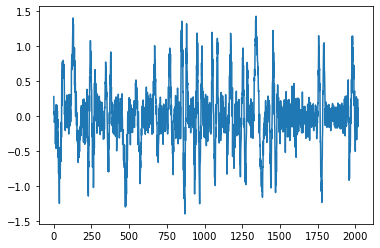

[5, 1, 6, 3, 1, 1, 2, 2, 6, 3, 3, 2, 3, 4, 6, 0, 0, 6, 0, 2]


In [284]:
plt.plot(data['inputs'][10])
plt.show()
print(data['targets'][10])

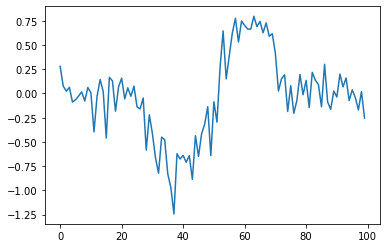

5


In [285]:
plt.plot(data['inputs'][10][0:100])
plt.show()
print(data['targets'][10][0])

In [286]:
# In Artificial Neural network model
#In the Target set of Array we have total of 10,000 waveforms 
#each set consisting of 20 classes of waveforms with length of 100
#Considering each set of waves of length 2000.Ommitting last 20 values in each set 
new_input=np.delete(inputs,slice(2000,2020),1)
new_input.shape


(10000, 2000)

In [287]:
#Splitting the total data into 85% training data and 15% test data
from sklearn.model_selection import train_test_split
train_input,test_input,train_target,test_target=train_test_split(new_input,targets,test_size=0.15)
print(train_input.shape)
print(test_input.shape)
print(train_target.shape)
print(test_target.shape)

(8500, 2000)
(1500, 2000)
(8500, 20)
(1500, 20)


In [288]:
#Now here we are splitting 8,500 set of train_input waves into 8500*20 waveforms(Each of length 100)

new_train_input=train_input.reshape(8500*20,100)
print(new_train_input.shape)
new_train_target=train_target.reshape(8500*20,1)
print(new_train_target.shape)


(170000, 100)
(170000, 1)


In [289]:
# Here we are defining three hidden layers and one output layer for our ANN Model 
hidden_layer1=keras.layers.Dense(units=50,input_shape=(100,),activation='relu')
hidden_layer2=keras.layers.Dense(units=50,activation='sigmoid')
hidden_layer3=keras.layers.Dense(units=40,activation='tanh')
output=keras.layers.Dense(units=30,activation='sigmoid')
model=tf.keras.Sequential([hidden_layer1,hidden_layer2,hidden_layer3,output])


In [290]:
#sgd=tf.keras.optimizers.SGD(learning_rate=0.01,decay=1e-6,momentum=0.9)
# here we are compiling the model with Stochastic Gradient Descent
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [291]:
#Here we are fitting the model
model.fit(new_train_input,new_train_target,epochs=100)

Epoch 1/100
5313/5313 [==============================] - 17s 3ms/step - loss: 0.4647 - accuracy: 0.7732
Epoch 2/100
5313/5313 [==============================] - 15s 3ms/step - loss: 0.2811 - accuracy: 0.8724
Epoch 3/100
5313/5313 [==============================] - 14s 3ms/step - loss: 0.2214 - accuracy: 0.9062
Epoch 4/100
5313/5313 [==============================] - 15s 3ms/step - loss: 0.1955 - accuracy: 0.9191
Epoch 5/100
5313/5313 [==============================] - 16s 3ms/step - loss: 0.1803 - accuracy: 0.9263
Epoch 6/100
5313/5313 [==============================] - 15s 3ms/step - loss: 0.1705 - accuracy: 0.9309
Epoch 7/100
5313/5313 [==============================] - 15s 3ms/step - loss: 0.1628 - accuracy: 0.9340
Epoch 8/100
5313/5313 [==============================] - 15s 3ms/step - loss: 0.1563 - accuracy: 0.9370
Epoch 9/100
5313/5313 [==============================] - 15s 3ms/step - loss: 0.1503 - accuracy: 0.9395
Epoch 10/100
5313/5313 [==============================] - 16s 3m

In [292]:
#Splitting test data
new_test_input=test_input.reshape(1500*20,100)
print(new_test_input.shape)
new_test_target=test_target.reshape(1500*20,1)
print(new_test_target.shape)

(30000, 100)
(30000, 1)


In [293]:
#here we are evaluating and predicting the model
model.evaluate(new_test_input,new_test_target)
y_predicted=model.predict(new_test_input)
print(y_predicted.shape)
print(new_test_target.shape)

938/938 [==============================] - 3s 2ms/step - loss: 0.1362 - accuracy: 0.9595
(30000, 30)
(30000, 1)


In [294]:
print(y_predicted[10])
print(new_test_target[10])
print(new_test_target.shape)

[3.45484492e-13 9.99632955e-01 2.21348346e-05 1.02706075e-01
 1.00000000e+00 8.07404518e-04 7.11360872e-02 4.70447247e-07
 2.94137379e-07 6.47873208e-07 3.97692389e-07 5.30020202e-07
 3.72877707e-07 2.90481125e-07 7.20639093e-07 3.10248481e-07
 4.24023398e-07 3.65442503e-07 2.03679093e-07 2.47041896e-07
 5.66490655e-07 3.67999746e-07 3.75492334e-07 2.76283828e-07
 3.83812989e-07 2.40741542e-07 6.71714588e-07 3.15398182e-07
 2.52991271e-07 4.20183113e-07]
[4]
(30000, 1)


In [295]:
targets_predicted=[np.argmax(i) for i in y_predicted]
#here we take the predicted targets
final_predicted_target=np.array(targets_predicted).reshape(1500,20)
print(final_predicted_target.shape)

(1500, 20)


In [296]:
#Here we combine all the 20 waves into one set regarding Actual data
final_test_input=new_test_input.reshape(1500,100*20)
print(final_test_input.shape)
final_test_target=new_test_target.reshape(1500,1*20)
print(final_test_target.shape)

(1500, 2000)
(1500, 20)


In [297]:
A = final_test_target - final_predicted_target
print(A)
nnz = np.count_nonzero(A)
nz=30000 - nnz
Accuracy=(nz/30000)*100
print('total_number_of_zeros')
print(nz)
print('Overall_Accuracy_in_Classification')
print(Accuracy)

[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  3  3]
 [ 0  0 -3 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]
total_number_of_zeros
28774
Overall_Accuracy_in_Classification
95.91333333333333


Actual Waveform with actual Targets


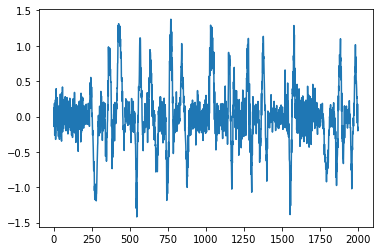

[0 0 4 5 4 2 1 5 1 0 4 6 2 2 0 2 0 1 5 2]


In [298]:
#Now here we take the actual waveform and actual targets
print("Actual Waveform with actual Targets")
plt.plot(final_test_input[0])
plt.show()
print(final_test_target[0])

Final Test Waveform with Predicted Targets


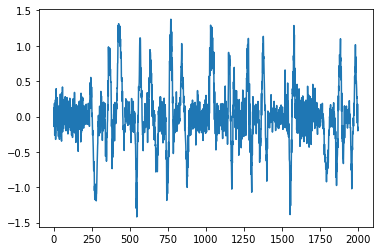

[0 0 4 5 4 2 1 5 4 0 4 6 2 2 0 2 0 1 5 2]


In [299]:
#Now here we take the predicted targets
print("Final Test Waveform with Predicted Targets")
plt.plot(final_test_input[0])
plt.show()
print(final_predicted_target[0])

Actual Waveform with actual Targets


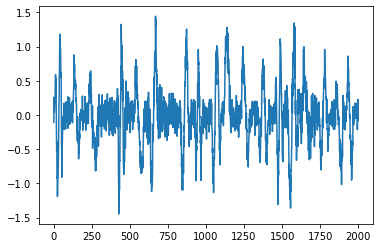

[6 4 1 0 6 4 2 0 5 3 5 4 1 5 3 5 1 2 1 2]


In [300]:
#Now here we take the actual waveform and actual targets
print("Actual Waveform with actual Targets")
plt.plot(final_test_input[5])
plt.show()

print(final_test_target[5])

Final corresponding test Waveform with Predicted Targets


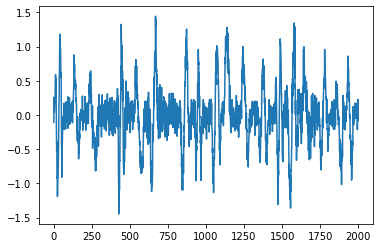

[6 4 1 0 6 4 2 0 5 3 5 4 1 5 3 5 1 2 1 2]


In [301]:
#Now here we take the predicted targets
print("Final corresponding test Waveform with Predicted Targets")
plt.plot(final_test_input[5])
plt.show()

print(final_predicted_target[5])

In [302]:
c_matrix = tf.math.confusion_matrix(labels=new_test_target,predictions=targets_predicted)
c_matrix

<tf.Tensor: shape=(7, 7), dtype=int32, numpy=
array([[4294,    0,    0,    0,    0,    0,    0],
       [   1, 3901,    0,    0,  308,    0,    0],
       [   1,    1, 4129,    1,    0,  142,    0],
       [   0,    0,    0, 4174,    0,    0,  172],
       [   0,  144,    0,    0, 4151,    0,    1],
       [   0,    0,  257,    0,    0, 3975,    0],
       [   0,    1,    1,  196,    0,    0, 4150]])>

Text(69.0, 0.5, 'True class')

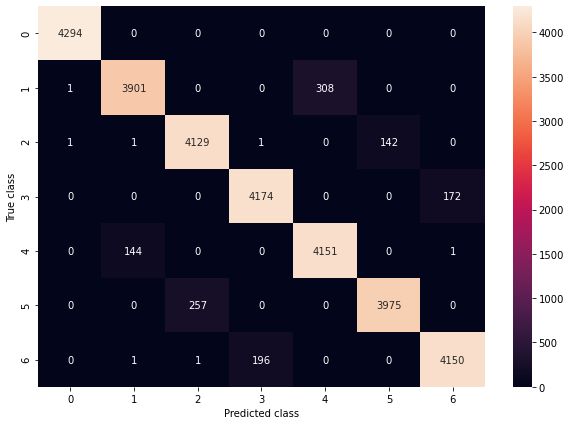

In [305]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(c_matrix,annot=True,fmt='d')
plt.xlabel('Predicted class')
plt.ylabel('True class')